<a href="https://colab.research.google.com/github/Krisss993/pandas/blob/main/121_130_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.25.2'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [2]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [29]:
google = fetch_financial_data(company='GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-03,172.54,174.53,171.16,173.17,27459118
2024-05-31,171.86,173.06,169.44,172.50,37638876
2024-05-30,175.20,175.22,171.79,172.11,22958677
2024-05-29,175.43,176.84,174.72,175.90,23388693
2024-05-28,174.45,177.27,174.37,176.40,20572157
...,...,...,...,...,...
2019-06-12,54.00,54.13,53.48,53.95,23673000
2019-06-11,54.85,55.20,53.98,54.05,33516340
2019-06-10,53.85,54.74,53.76,54.14,28509280


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [6]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2024-06-03 to 2019-06-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [7]:
google.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,106.125793,107.343213,104.999455,106.208018,3.332755e+07
std,30.620574,30.872778,30.344984,30.620785,1.453696e+07
min,52.310500,52.500000,50.443500,52.388000,9.312760e+06
25%,76.155500,77.044500,75.410500,75.972000,2.409090e+07
50%,107.040000,108.649000,105.780000,107.590000,2.972367e+07
75%,133.424000,135.030000,131.840000,133.420000,3.743138e+07
max,177.070000,178.770000,176.080000,177.850000,1.231992e+08


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [8]:
pd.options.display.float_format = '{:.2f}'.format

__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [9]:
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,106.13,107.34,105.00,106.21,33327550.76
std,30.62,30.87,30.34,30.62,14536957.69
min,52.31,52.50,50.44,52.39,9312760.00
25%,76.16,77.04,75.41,75.97,24090902.00
50%,107.04,108.65,105.78,107.59,29723667.00
75%,133.42,135.03,131.84,133.42,37431380.00
max,177.07,178.77,176.08,177.85,123199220.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

<Axes: xlabel='Date'>

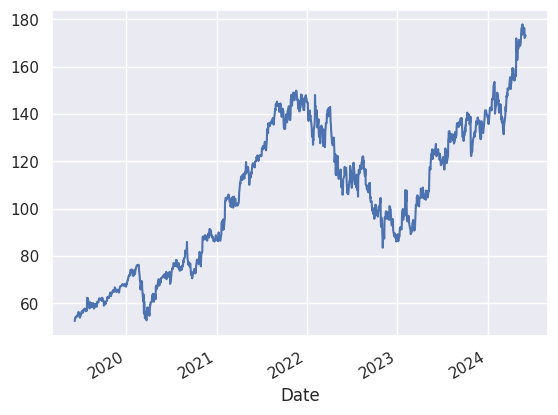

In [30]:
google['Close'].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [31]:
google.reset_index(inplace=True)
google

,Date,Open,High,Low,Close,Volume
0,2024-06-03,172.54,174.53,171.16,173.17,27459118
1,2024-05-31,171.86,173.06,169.44,172.50,37638876
2,2024-05-30,175.20,175.22,171.79,172.11,22958677
3,2024-05-29,175.43,176.84,174.72,175.90,23388693
4,2024-05-28,174.45,177.27,174.37,176.40,20572157
...,...,...,...,...,...,...
1252,2019-06-12,54.00,54.13,53.48,53.95,23673000
1253,2019-06-11,54.85,55.20,53.98,54.05,33516340
1254,2019-06-10,53.85,54.74,53.76,54.14,28509280
1255,2019-06-07,52.71,53.67,52.56,53.42,43827140


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [33]:
google['Month'] = google['Date'].dt.month
google['Year'] = google['Date'].dt.year
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2024-06-03,172.54,174.53,171.16,173.17,27459118,6,2024
1,2024-05-31,171.86,173.06,169.44,172.50,37638876,5,2024
2,2024-05-30,175.20,175.22,171.79,172.11,22958677,5,2024
3,2024-05-29,175.43,176.84,174.72,175.90,23388693,5,2024
4,2024-05-28,174.45,177.27,174.37,176.40,20572157,5,2024
...,...,...,...,...,...,...,...,...
1252,2019-06-12,54.00,54.13,53.48,53.95,23673000,6,2019
1253,2019-06-11,54.85,55.20,53.98,54.05,33516340,6,2019
1254,2019-06-10,53.85,54.74,53.76,54.14,28509280,6,2019
1255,2019-06-07,52.71,53.67,52.56,53.42,43827140,6,2019


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [39]:
google.groupby('Year')['Close'].mean()

Year
2019    61.00
2020    73.95
2021   124.22
2022   114.76
2023   118.79
2024   152.28
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

<Axes: xlabel='Year'>

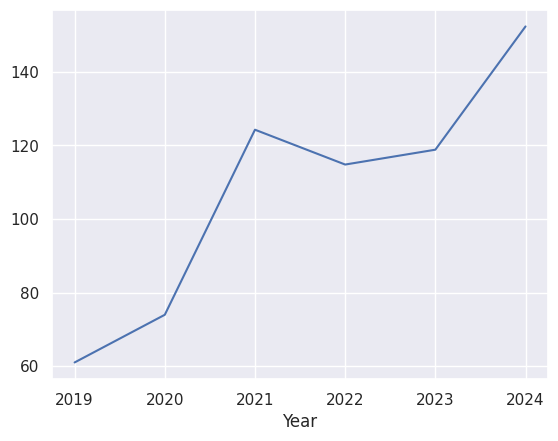

In [40]:
google.groupby('Year')['Close'].mean().plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [42]:
google.groupby('Month')['Close'].mean()

Month
1    107.12
2    110.74
3    106.91
4    113.65
5    118.15
6     98.76
7     98.56
8    104.90
9    103.20
10   101.69
11   105.84
12   105.62
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

<Axes: xlabel='Month'>

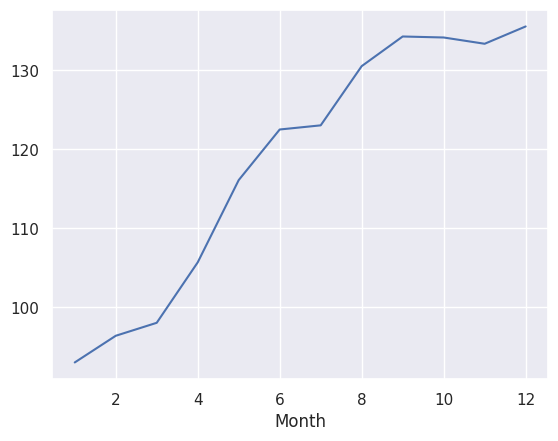

In [48]:
google[google['Year'] == 2023].groupby('Month')['Close'].mean().plot()

In [ ]:
google.groupby('Month')['Close'].mean().plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [ ]:
# tutaj wpisz rozwiązanie

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [ ]:
# tutaj wpisz rozwiązanie

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [ ]:
# tutaj wpisz rozwiązanie

### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [ ]:
# tutaj wpisz rozwiązanie

### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [ ]:
# tutaj wpisz rozwiązanie

### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [ ]:
# tutaj wpisz rozwiązanie

### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [ ]:
# tutaj wpisz rozwiązanie